In [86]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Classification problems
* email spam or not spam(binary classification 0/1)
* tumour is malignant or benial
* sushisteak/pizza (not a binary classification but multiclass classification)
* imagenet is famous dataset
* multilabel classification(multiple names for the same image.data

* architecture of neural network classification model
* input shape and output shape
* saving and loading model
* different classification evaluation methids
* creating the custom data to view,fit and predict on
* harness the power of linearity and non linearity
* different classification evaluation methods


In [87]:
## classification inputs and outputs
## numberic representation if the images w=224,h=224,c=3
## c=color channel rgb

In [88]:
## the outputs give the predictions between 0 and 1


In [89]:
## shape=[batch,c,width,height]

In [90]:
## 32 is a very commin batch size

In [91]:
## Architecture of classification model


In [92]:
# predictions proababitlity

In [93]:
## we are going to build many of these

* input layer(in_features)
* Hinnden layer(minimum=1,max=unlimited)
* resnet architecture will have the 50 layers
* output layer one for each class
* ReLU hidden layer activation (retified linear function)
* loss function(binary cross entropy loss function)
* optimizer (SGD,Adam,etc)

# 2.neural network classification with pytorch
* Classification problem wether something is onething or another(there can be multiple thins in options).

In [94]:
##1. Data
## make classificatoin data and get it ready

In [95]:
from sklearn.datasets import make_circles

In [96]:
## make 1000 samples
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [97]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [98]:
len(x),len(y)

(1000, 1000)

In [99]:
print(f"first 5 samples x: {x[:5]}")
print(f"first 5 samples x: {y[:5]}")

first 5 samples x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples x: [1 1 1 1 0]


In [100]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [101]:
# make a dataframe of circle data
circles=pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"label":y})

In [102]:
circles

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


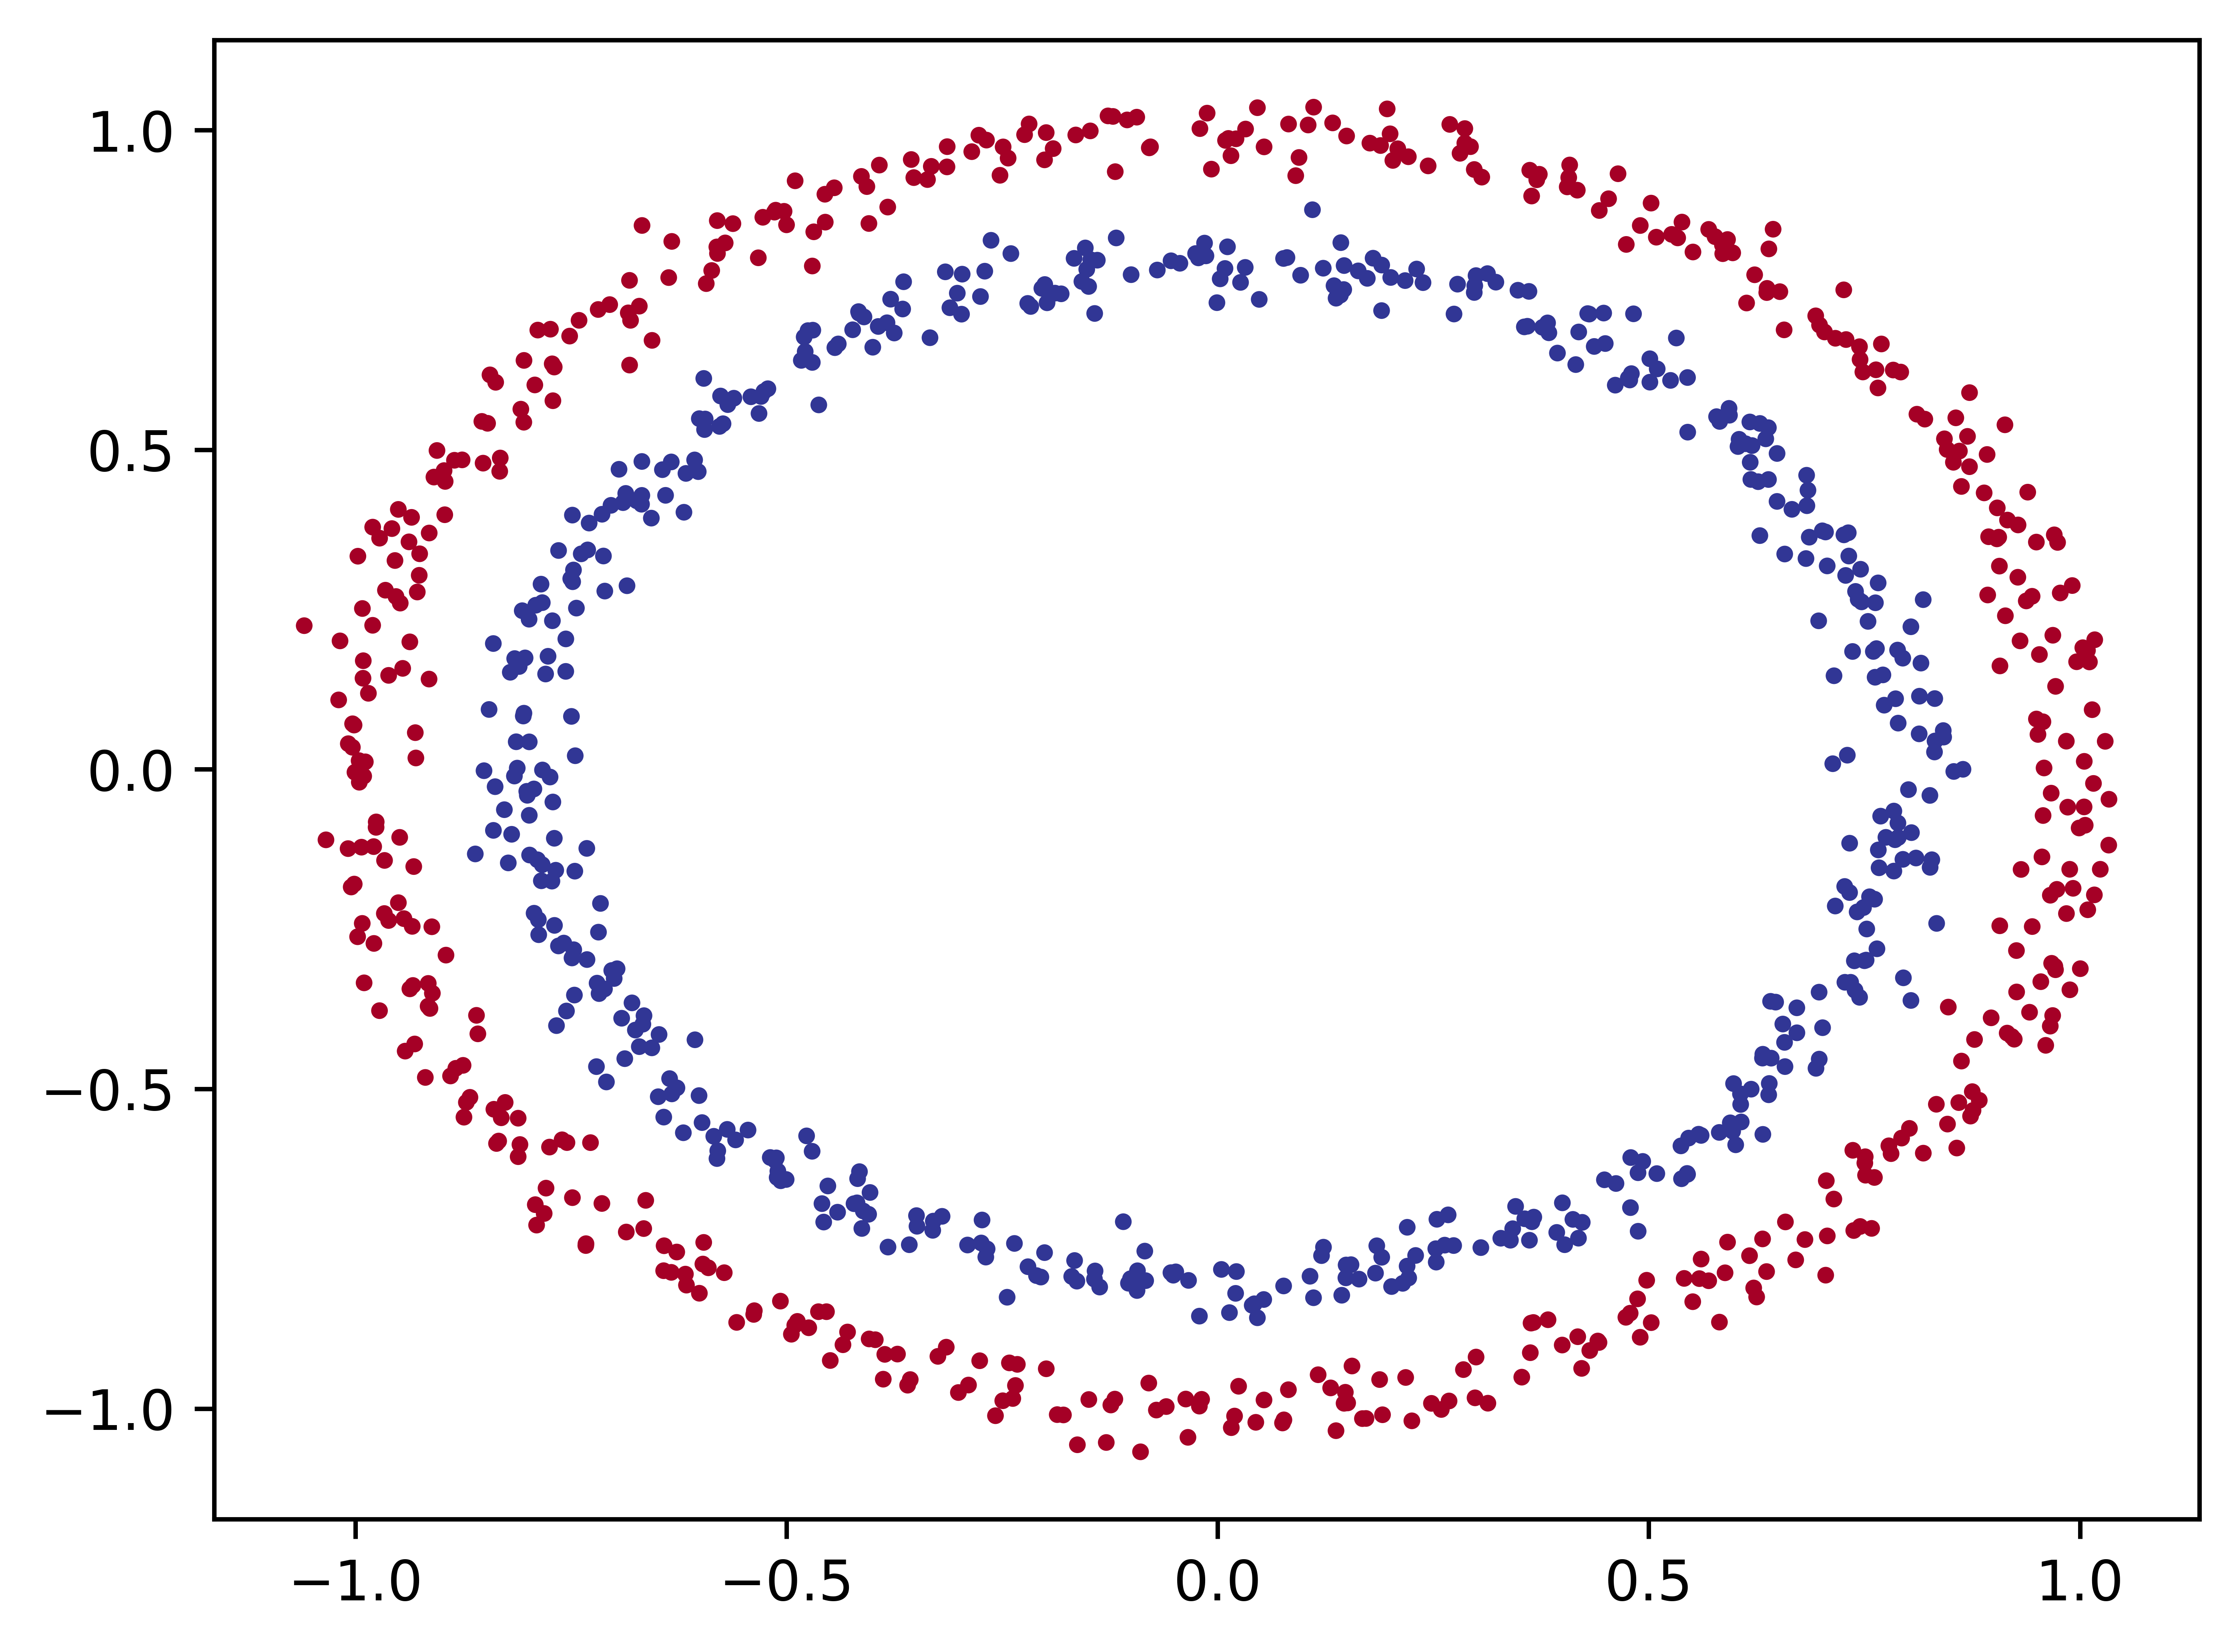

In [103]:
# visualize
plt.figure(dpi=1000)
plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu,s=4)
plt.savefig("circlefig.png")

### the data set was called as toydataset which was used to learn

### 1.1 check input and output shapes

In [104]:
x.shape,y.shape

((1000, 2), (1000,))

In [105]:
## first example 
x_sample=x[0]
y_sample=y[0]
print(f"sample vslues of x,y {x_sample,y_sample}")

sample vslues of x,y (array([0.75424625, 0.23148074]), 1)


## 1.2 turn the data into the tensors

In [106]:
torch.__version__

'2.4.1'

In [107]:
x=torch.from_numpy(x).type(torch.float32)

In [108]:
x

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [109]:
y=torch.from_numpy(y).type(torch.float32)

In [110]:
y

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 

In [111]:
x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [112]:
## splitting the data into training and test sets

In [113]:
from sklearn.model_selection import train_test_split

In [120]:
torch.manual_seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [121]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## 2.1 create a Model
* to classify the blue and red dots

  1. Setup the agostic code so that our code will run on an accelerated(GPU)
  2. construct a model(by subclassing `nn.Module`
  3. Define a loss function and optimizer
  4. Creating a training and test loop
  

In [122]:
## to allow to learn the patterns

In [123]:
n_samples


1000

In [124]:
device="mps" if torch.backends.mps.is_available() else 'cpu'

In [125]:
device


'mps'

In [127]:
x_train.device

device(type='cpu')

In [132]:
x_train.to(device)
x_test.to(device)
y_train.to(device)
y_test.to(device)

tensor([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
        1., 1.], device='mps:0')

In [133]:
x_train.device

device(type='cpu')

In [150]:
class classification(nn.Module):

    def __init__(self):
        super().__init__()
        #2. create two nn.Layer layers capable of shapes of data
        self.layer1=nn.Linear(in_features=2,out_features=104)
        self.layer2=nn.Linear(in_features=104,out_features=1)

        self.two_layer=nn.Sequential(
            nn.Linear(in_features=2,out_features=96),
            nn.Linear(in_features=96,out_features=1)
        )
        ## more the hidden features mode way to learn


    def forward(self,x):
        return self.layer2(self.layer1(x))


In [151]:
model=classification()

In [152]:
model.to(device)

classification(
  (layer1): Linear(in_features=2, out_features=104, bias=True)
  (layer2): Linear(in_features=104, out_features=1, bias=True)
  (two_layer): Sequential(
    (0): Linear(in_features=2, out_features=96, bias=True)
    (1): Linear(in_features=96, out_features=1, bias=True)
  )
)

In [149]:
device

'mps'

In [138]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
   

In [139]:
next(model.parameters()).device

device(type='mps', index=0)

In [158]:
## lets replace the model with sequential

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=128),
    nn.Linear(in_features=128,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=1, bias=True)
)

In [159]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2017, -0.4508],
                      [ 0.6730,  0.3239],
                      [ 0.1093,  0.5001],
                      [-0.6076,  0.1524],
                      [-0.3329, -0.0718],
                      [ 0.2317,  0.3132],
                      [ 0.1622, -0.5473],
                      [-0.4425,  0.0123],
                      [-0.1225, -0.5919],
                      [ 0.6966,  0.0889],
                      [-0.5024,  0.3101],
                      [ 0.3072, -0.3469],
                      [ 0.3546, -0.4386],
                      [ 0.2450,  0.6717],
                      [ 0.4668,  0.3491],
                      [-0.1439,  0.1327],
                      [ 0.2468,  0.1727],
                      [-0.1433,  0.0987],
                      [-0.2864, -0.3997],
                      [-0.6525, -0.5765],
                      [-0.4439,  0.6759],
                      [ 0.1415, -0.6397],
                      [-0.3615,  0.1652],
        

In [160]:
untrained_pred=model_0(x_test.to(device))

In [164]:
untrained_pred
print(f"length of predictions: {len(untrained_pred)}, shape :{untrained_pred
.shape}") 

length of predictions: 200, shape :torch.Size([200, 1])


In [165]:
y_test,x_test

(tensor([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
         1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
         0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
         0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
         0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
         1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
         1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
         1., 1.]),
 tensor([[ 7.9218e-01,  6.2157e-01],
         [-4.0489e-01, -6.9614e-01],
         [-7.879

## set up loss function and optimizer
* loss function and optimizer selection
* for regression we use nn.L1Loss and SGD
* for classificaton binary cross entropy or categorical cross entropy

In [166]:
loss_fn=nn.BCELoss()

In [167]:
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)